In [1]:
#Importing all the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline

In [26]:
#Loading the three datasets
confirmed_cases = pd.read_csv('confirmed_global.csv')
deaths_reported = pd.read_csv('deaths_global.csv')
recovered_cases = pd.read_csv('recovered_global.csv')

In [27]:
#display the head of the dataset
confirmed_cases.head()


,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,4/1/2021,4/2/2021,4/3/2021,4/4/2021,4/5/2021,4/6/2021,4/7/2021,4/8/2021,4/9/2021,4/10/2021
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,56517,56572,56595,56676,56717,56779,56873,56943,57019,57144
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,125506,125842,126183,126531,126795,126936,127192,127509,127795,128155
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,117304,117429,117524,117622,117739,117879,118004,118116,118251,118378
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,12053,12115,12174,12231,12286,12328,12363,12409,12456,12497
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,22399,22467,22579,22631,22717,22885,23010,23108,23242,23331


In [23]:
deaths_reported.head()


,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,4/1/2021,4/2/2021,4/3/2021,4/4/2021,4/5/2021,4/6/2021,4/7/2021,4/8/2021,4/9/2021,4/10/2021
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2489,2495,2496,2497,2508,2512,2512,2516,2521,2521
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2241,2247,2256,2265,2274,2283,2291,2297,2304,2310
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3096,3099,3102,3105,3108,3112,3116,3119,3123,3126
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,115,116,117,117,117,117,119,120,120,120
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,538,538,540,542,543,547,547,549,549,550


In [28]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,4/1/2021,4/2/2021,4/3/2021,4/4/2021,4/5/2021,4/6/2021,4/7/2021,4/8/2021,4/9/2021,4/10/2021
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,51788,51798,51802,51885,51902,51928,51940,51956,51961,51962
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,91875,92500,93173,93842,94431,95035,95600,96129,96672,97206
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,81632,81729,81813,81896,81994,82096,82192,82289,82392,82493
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,11365,11401,11428,11474,11523,11570,11616,11692,11732,11770
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,20508,20867,20871,20879,21452,21489,21545,21557,21589,21890


In [18]:
#Extracting all the columns using the .keys() function
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/2020',
       '1/23/2020', '1/24/2020', '1/25/2020', '1/26/2020', '1/27/2020',
       ...
       '4/1/2021', '4/2/2021', '4/3/2021', '4/4/2021', '4/5/2021', '4/6/2021',
       '4/7/2021', '4/8/2021', '4/9/2021', '4/10/2021'],
      dtype='object', length=449)

In [19]:
confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]

In [24]:
deaths = deaths_reported.loc[:, cols[4]:cols[-1]]

In [29]:
recoveries = recovered_cases.loc[:, cols[4]:cols[-1]]

In [30]:
#check the head of the outbreak cases
confirmed.head()

,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,...,4/1/2021,4/2/2021,4/3/2021,4/4/2021,4/5/2021,4/6/2021,4/7/2021,4/8/2021,4/9/2021,4/10/2021
0,0,0,0,0,0,0,0,0,0,0,...,56517,56572,56595,56676,56717,56779,56873,56943,57019,57144
1,0,0,0,0,0,0,0,0,0,0,...,125506,125842,126183,126531,126795,126936,127192,127509,127795,128155
2,0,0,0,0,0,0,0,0,0,0,...,117304,117429,117524,117622,117739,117879,118004,118116,118251,118378
3,0,0,0,0,0,0,0,0,0,0,...,12053,12115,12174,12231,12286,12328,12363,12409,12456,12497
4,0,0,0,0,0,0,0,0,0,0,...,22399,22467,22579,22631,22717,22885,23010,23108,23242,23331


In [32]:
#finding the total confirmed cases, death cases and the recovered cases and append them to an 4 empty lists
#Also, calculate the total mortality rate which is the death_sum/confirmed cases

dates = confirmed.keys()
world_cases = []
total_deaths = []
mortality_rate = []
total_recovered = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [33]:
# Let's display each of the newly created vvariables
confirmed_sum

135355885

In [34]:
death_sum

2927807

In [35]:
recovered_sum

76891123

In [36]:
world_cases

[557,
 655,
 941,
 1433,
 2118,
 2927,
 5578,
 6167,
 8235,
 9927,
 12038,
 16787,
 19887,
 23898,
 27643,
 30803,
 34396,
 37130,
 40160,
 42769,
 44811,
 45229,
 60382,
 66909,
 69052,
 71235,
 73270,
 75152,
 75652,
 76212,
 76841,
 78602,
 78982,
 79546,
 80399,
 81376,
 82736,
 84122,
 86013,
 88394,
 90377,
 92971,
 95279,
 98090,
 102003,
 106098,
 110047,
 114219,
 119041,
 126702,
 132492,
 146876,
 157950,
 169219,
 184027,
 199970,
 219535,
 246584,
 277359,
 309350,
 344205,
 387040,
 428219,
 479220,
 542097,
 607138,
 674418,
 733655,
 798949,
 875794,
 958586,
 1041649,
 1125200,
 1183589,
 1256181,
 1329324,
 1399153,
 1482508,
 1569527,
 1655062,
 1729373,
 1849067,
 1919799,
 2003766,
 2080914,
 2176465,
 2264462,
 2341702,
 2418307,
 2494325,
 2570074,
 2651321,
 2735570,
 2819666,
 2901925,
 2973513,
 3043705,
 3119245,
 3196355,
 3279850,
 3368226,
 3447426,
 3523799,
 3601488,
 3681990,
 3772018,
 3860724,
 3951003,
 4036226,
 4111202,
 4187833,
 4272324,
 4357304

In [38]:
#Covert all the dates and the cases in the form of a numpy array

days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [39]:
days_since_1_22

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [40]:
world_cases

array([[      557],
       [      655],
       [      941],
       [     1433],
       [     2118],
       [     2927],
       [     5578],
       [     6167],
       [     8235],
       [     9927],
       [    12038],
       [    16787],
       [    19887],
       [    23898],
       [    27643],
       [    30803],
       [    34396],
       [    37130],
       [    40160],
       [    42769],
       [    44811],
       [    45229],
       [    60382],
       [    66909],
       [    69052],
       [    71235],
       [    73270],
       [    75152],
       [    75652],
       [    76212],
       [    76841],
       [    78602],
       [    78982],
       [    79546],
       [    80399],
       [    81376],
       [    82736],
       [    84122],
       [    86013],
       [    88394],
       [    90377],
       [    92971],
       [    95279],
       [    98090],
       [   102003],
       [   106098],
       [   110047],
       [   114219],
       [   119041],
       [   126702],


In [41]:
total_deaths

array([[     17],
       [     18],
       [     26],
       [     42],
       [     56],
       [     82],
       [    131],
       [    133],
       [    171],
       [    213],
       [    259],
       [    362],
       [    426],
       [    492],
       [    564],
       [    634],
       [    719],
       [    806],
       [    906],
       [   1013],
       [   1113],
       [   1118],
       [   1371],
       [   1523],
       [   1666],
       [   1770],
       [   1868],
       [   2008],
       [   2123],
       [   2248],
       [   2252],
       [   2459],
       [   2470],
       [   2630],
       [   2710],
       [   2771],
       [   2814],
       [   2873],
       [   2942],
       [   2996],
       [   3085],
       [   3160],
       [   3255],
       [   3349],
       [   3460],
       [   3564],
       [   3803],
       [   3993],
       [   4267],
       [   4611],
       [   4917],
       [   5414],
       [   5834],
       [   6475],
       [   7153],
       [  

In [42]:
total_recovered

array([[      30],
       [      32],
       [      39],
       [      42],
       [      56],
       [      65],
       [     108],
       [     127],
       [     145],
       [     225],
       [     287],
       [     476],
       [     627],
       [     857],
       [    1129],
       [    1492],
       [    2016],
       [    2616],
       [    3245],
       [    3947],
       [    4684],
       [    5151],
       [    6294],
       [    8057],
       [    9396],
       [   10866],
       [   12583],
       [   14352],
       [   16121],
       [   18179],
       [   18892],
       [   22889],
       [   23394],
       [   25227],
       [   27905],
       [   30386],
       [   33278],
       [   36710],
       [   39781],
       [   42717],
       [   45601],
       [   48227],
       [   51169],
       [   53795],
       [   55863],
       [   58357],
       [   60694],
       [   62493],
       [   64400],
       [   66998],
       [   68321],
       [   70248],
       [   7

In [43]:
#Future forecasting for the next 10 days

days_in_future = 10
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dats = future_forecast[:-10]

In [44]:
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [48]:
#convert all the integers into datetime for better visualization
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [49]:
# For visualization with the latest data of 15th of march
latest_confirmed = confirmed_cases[dates[-1]]
latest_deaths = deaths_reported[dates[-1]]
latest_recoveries = recovered_cases[dates[-1]]

In [50]:
latest_confirmed

0       57144
1      128155
2      118378
3       12497
4       23331
        ...  
269      2692
270    265897
271      5276
272     89918
273     37273
Name: 4/10/2021, Length: 274, dtype: int64

In [51]:
latest_deaths

0      2521
1      2310
2      3126
3       120
4       550
       ... 
269      35
270    2838
271    1031
272    1226
273    1538
Name: 4/10/2021, Length: 274, dtype: int64

In [52]:
latest_recoveries

0       51962
1       97206
2       82493
3       11770
4       21890
        ...  
254      2429
255    231288
256      2027
257     86813
258     34862
Name: 4/10/2021, Length: 259, dtype: int64

In [53]:
#Find the list of unique countries
unique_countries = list(confirmed_cases['Country/Region'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [55]:
# the next line of code will basically calculate the total number of confirmed cases by each country

country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_cases['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
for i in no_cases:
    unique_countries.remove(i)
    
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_cases['Country/Region']==unique_countries[i]].sum()

In [56]:
#number of cases per country/region
print('Confirmed Cases by Countries/Regions: ')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Confirmed Cases by Countries/Regions: 
US: 31151495 cases
Brazil: 13445006 cases
India: 13358805 cases
France: 5001685 cases
Russia: 4580633 cases
United Kingdom: 4382880 cases
Turkey: 3798333 cases
Italy: 3754077 cases
Spain: 3347512 cases
Germany: 3009452 cases
Poland: 2552898 cases
Colombia: 2518715 cases
Argentina: 2517300 cases
Mexico: 2278420 cases
Iran: 2049078 cases
Ukraine: 1893192 cases
Peru: 1639767 cases
Czechia: 1577972 cases
Indonesia: 1562868 cases
South Africa: 1557527 cases
Netherlands: 1366024 cases
Chile: 1068522 cases
Canada: 1060052 cases
Romania: 1002865 cases
Belgium: 922487 cases
Iraq: 918155 cases
Sweden: 857401 cases
Philippines: 853209 cases
Israel: 835813 cases
Portugal: 826928 cases
Pakistan: 721018 cases
Hungary: 713868 cases
Bangladesh: 678937 cases
Jordan: 662395 cases
Serbia: 639476 cases
Switzerland: 617543 cases
Austria: 574755 cases
Japan: 503537 cases
Morocco: 501688 cases
Lebanon: 494633 cases
United Arab Emirates: 481937 cases
Saudi Arabia: 397636

In [61]:
# find the list of unique provinces

unique_provinces =list(confirmed_cases['Province/State'].unique())
unique_provinces

[nan,
 'Australian Capital Territory',
 'New South Wales',
 'Northern Territory',
 'Queensland',
 'South Australia',
 'Tasmania',
 'Victoria',
 'Western Australia',
 'Alberta',
 'British Columbia',
 'Diamond Princess',
 'Grand Princess',
 'Manitoba',
 'New Brunswick',
 'Newfoundland and Labrador',
 'Northwest Territories',
 'Nova Scotia',
 'Nunavut',
 'Ontario',
 'Prince Edward Island',
 'Quebec',
 'Repatriated Travellers',
 'Saskatchewan',
 'Yukon',
 'Anhui',
 'Beijing',
 'Chongqing',
 'Fujian',
 'Gansu',
 'Guangdong',
 'Guangxi',
 'Guizhou',
 'Hainan',
 'Hebei',
 'Heilongjiang',
 'Henan',
 'Hong Kong',
 'Hubei',
 'Hunan',
 'Inner Mongolia',
 'Jiangsu',
 'Jiangxi',
 'Jilin',
 'Liaoning',
 'Macau',
 'Ningxia',
 'Qinghai',
 'Shaanxi',
 'Shandong',
 'Shanghai',
 'Shanxi',
 'Sichuan',
 'Tianjin',
 'Tibet',
 'Xinjiang',
 'Yunnan',
 'Zhejiang',
 'Faroe Islands',
 'Greenland',
 'French Guiana',
 'French Polynesia',
 'Guadeloupe',
 'Martinique',
 'Mayotte',
 'New Caledonia',
 'Reunion',
 'Sai

In [62]:
#Finding the number of confirmed cases per province, state or city

province_confirmed_cases = []
no_cases = []
for i in unique_provinces:
    cases = latest_confirmed[confirmed_cases['Province/State']==i].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
for i in no_cases:
    unique_provinces.remove(i)

In [64]:
#number of cases per province/state/city
for i in range(len(unique_provinces)):
    print(f'{unique_provinces[i]}: {province_confirmed_cases[i]} cases')

Australian Capital Territory: 123 cases
New South Wales: 5330 cases
Northern Territory: 112 cases
Queensland: 1502 cases
South Australia: 666 cases
Tasmania: 234 cases
Victoria: 20485 cases
Western Australia: 953 cases
Alberta: 159719 cases
British Columbia: 109540 cases
Grand Princess: 13 cases
Manitoba: 35104 cases
New Brunswick: 1713 cases
Newfoundland and Labrador: 1029 cases
Northwest Territories: 49 cases
Nova Scotia: 1764 cases
Nunavut: 395 cases
Ontario: 389648 cases
Prince Edward Island: 160 cases
Quebec: 324848 cases
Repatriated Travellers: 13 cases
Saskatchewan: 35983 cases
Yukon: 74 cases
Anhui: 994 cases
Beijing: 1056 cases
Chongqing: 591 cases
Fujian: 576 cases
Gansu: 193 cases
Guangdong: 2296 cases
Guangxi: 270 cases
Guizhou: 147 cases
Hainan: 171 cases
Hebei: 1317 cases
Heilongjiang: 1610 cases
Henan: 1311 cases
Hong Kong: 11568 cases
Hubei: 68154 cases
Hunan: 1044 cases
Inner Mongolia: 377 cases
Jiangsu: 716 cases
Jiangxi: 937 cases
Jilin: 573 cases
Liaoning: 408 cases

In [66]:
#handling non values if there is any
nan_indices = []

for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)
unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

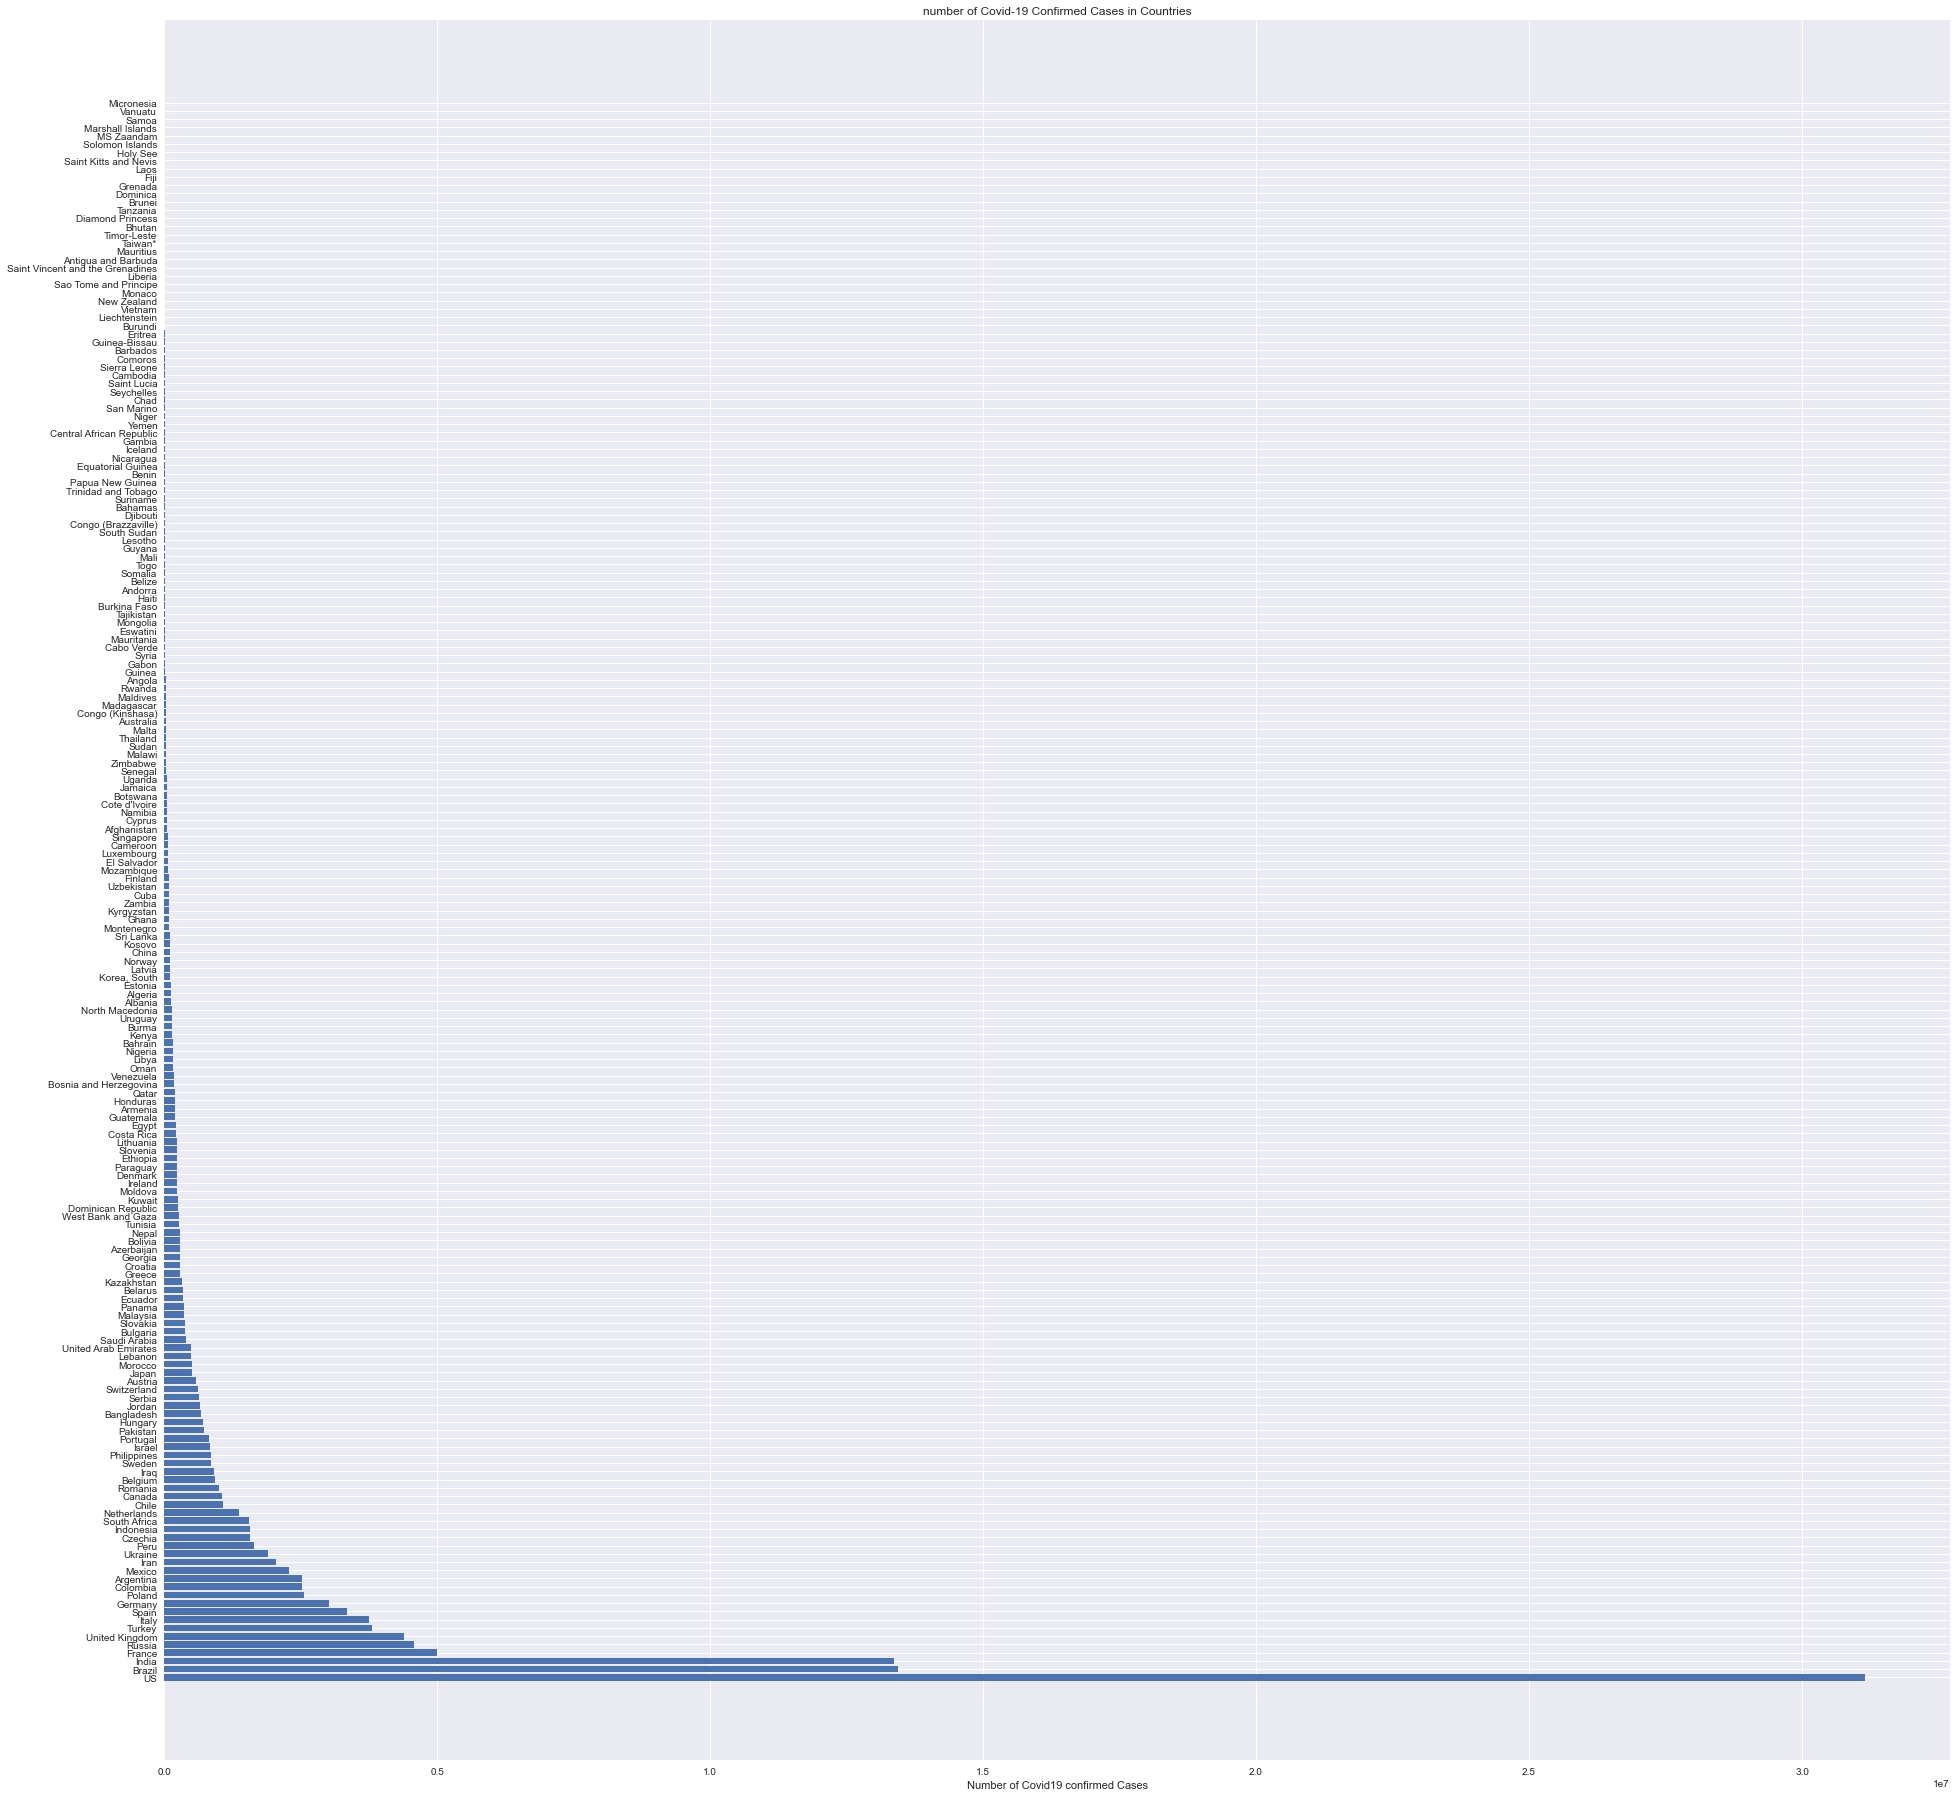

In [67]:
#Plot a bar graph to see the total confirmed cases across different countries

plt.figure(figsize=(32, 32))
plt.barh(unique_countries, country_confirmed_cases)
plt.title('number of Covid-19 Confirmed Cases in Countries')
plt.xlabel('Number of Covid19 confirmed Cases')
plt.show()

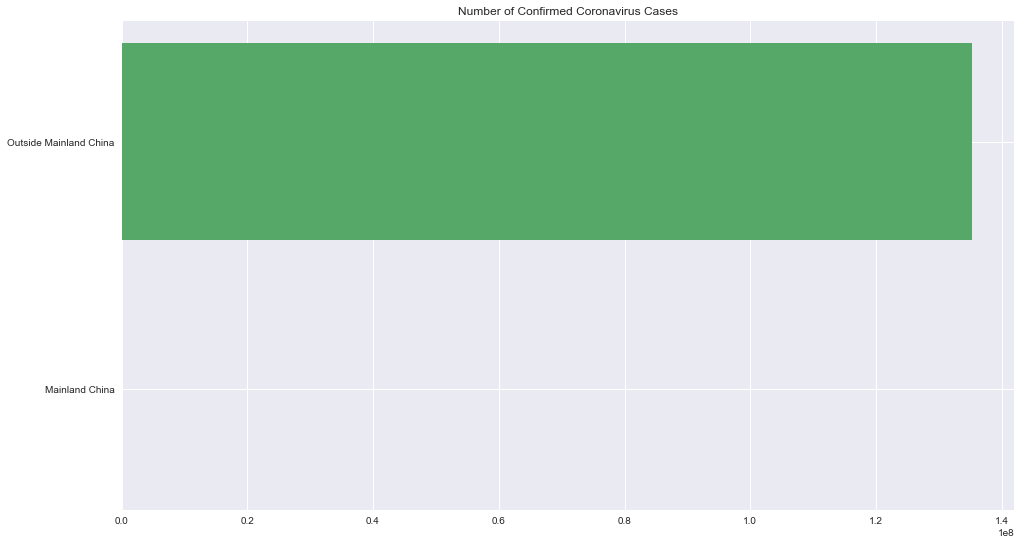

In [78]:
# Plt a bar graph to see the total confirmed cases between mainland china and outside mainland china
china_confirmed = latest_confirmed[confirmed_cases['Country/Region']=='China'].sum()
outside_mainland_china_confirmed = np.sum(country_confirmed_cases) - china_confirmed
plt.figure(figsize=(16, 9))
plt.barh('Mainland China', china_confirmed)
plt.barh('Outside Mainland China', outside_mainland_china_confirmed)
plt.title('Number of Confirmed Coronavirus Cases')
plt.show()

In [70]:
#Print the total cases in mainland china and outside of it

print('Outside Mainland china {} cases: '.format(outside_mainland_china_confirmed))
print('Mainland china: {} cases'.format(china_confirmed))
print('Total: {} cases'.format(china_confirmed+outside_mainland_china_confirmed))

Outside Mainland china 135253858 cases: 
Mainland china: 102027 cases
Total: 135355885 cases


In [90]:
#only show q0 countries with the most confirmed cases, the rest are grouped into the category named others

visual_unique_countries = []
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])
for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])

visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)


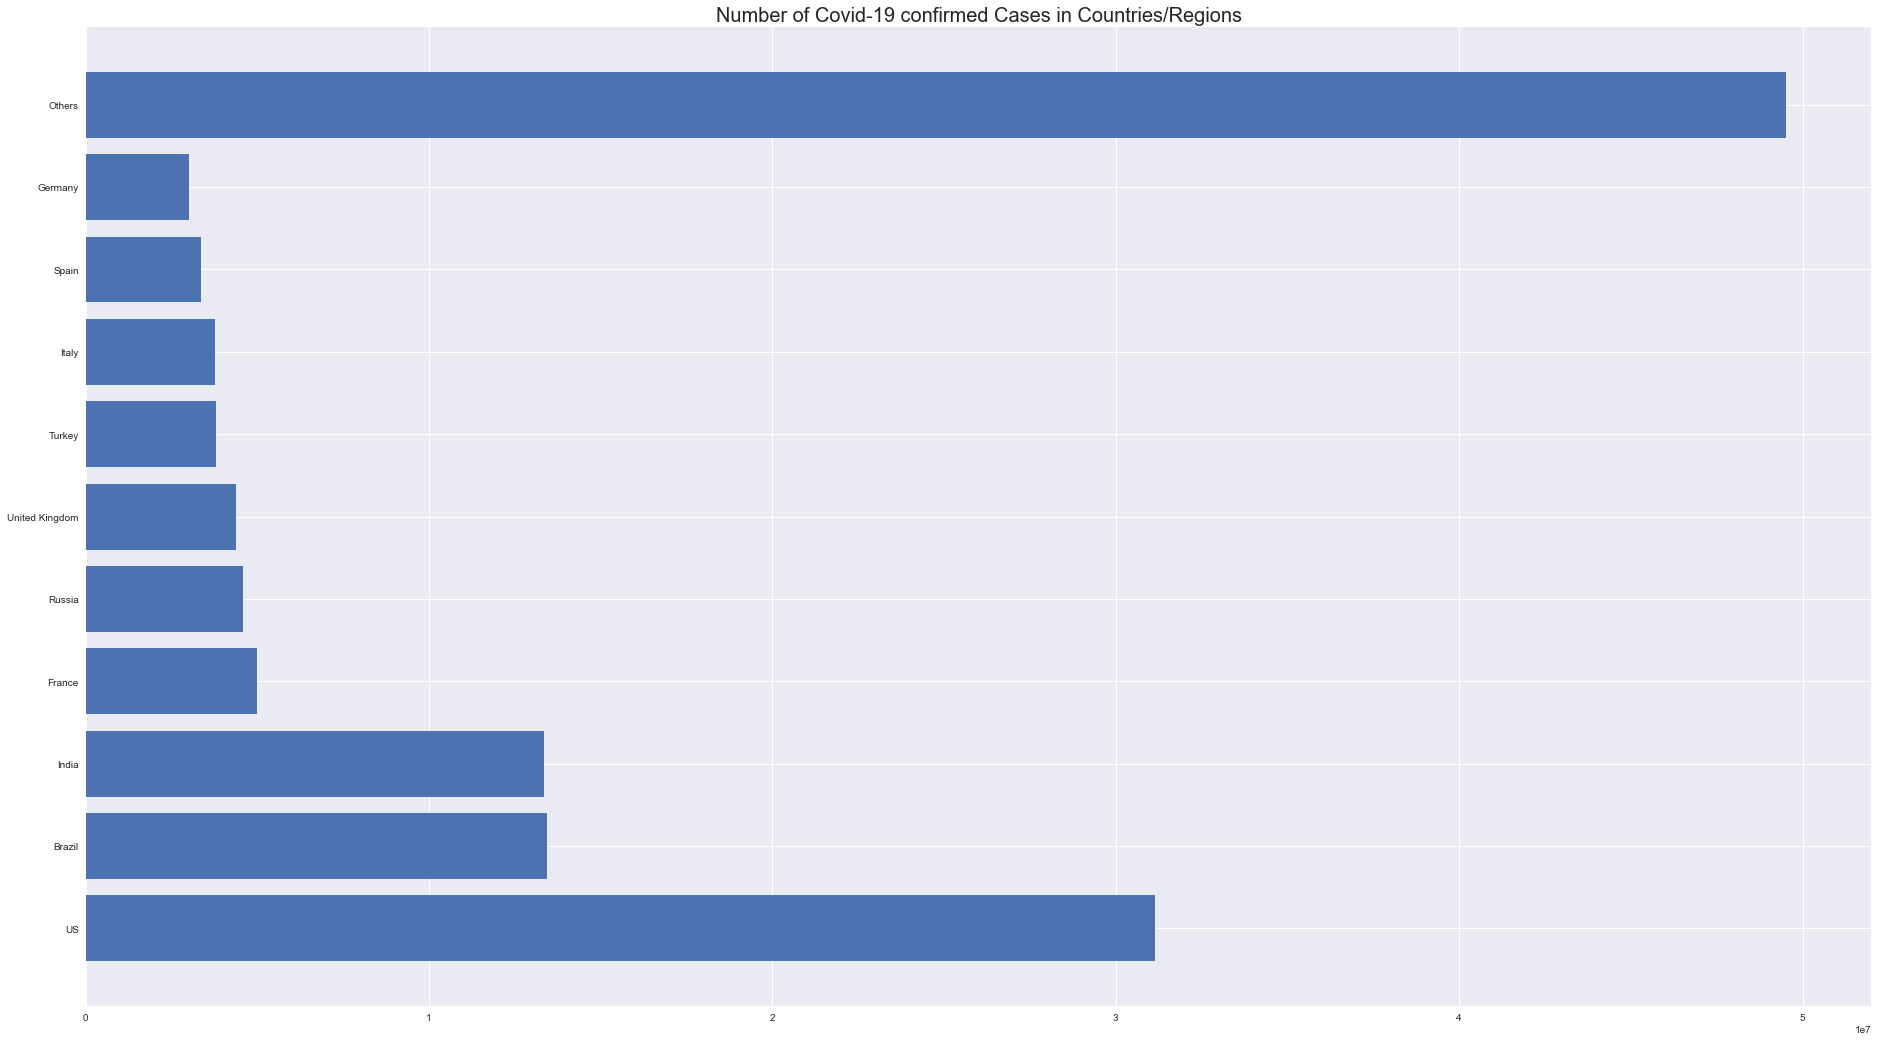

In [80]:
#visualize the 10 countries
plt.figure(figsize=(32, 18))
plt.barh(visual_unique_countries, visual_confirmed_cases)
plt.title('Number of Covid-19 confirmed Cases in Countries/Regions', size=20)
plt.show()

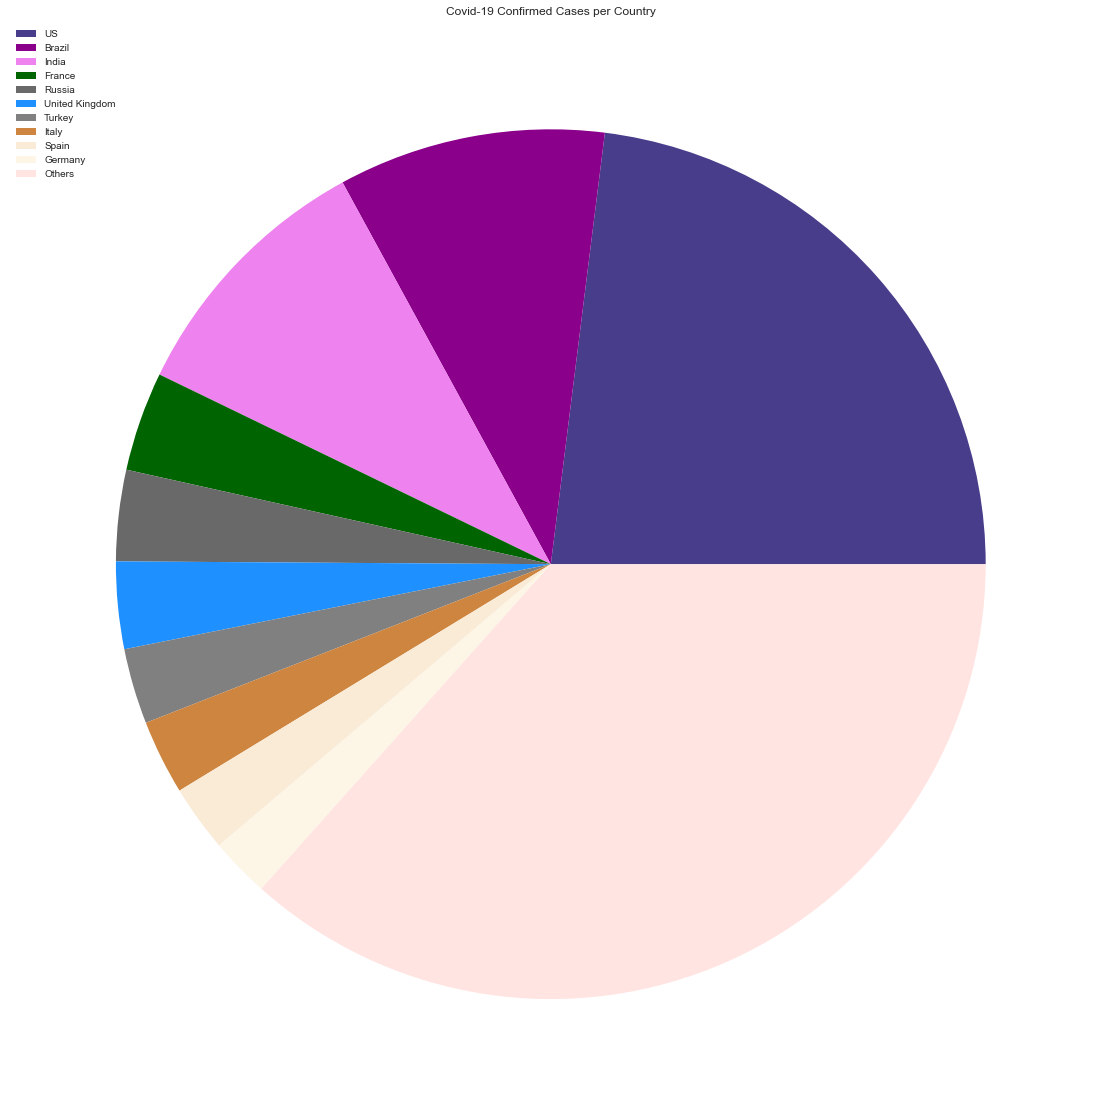

In [81]:
# Create a pie chart to see the total confirmed cases in 10 different countries
c = random.choices(list(mcolors.CSS4_COLORS.values()), k =len(unique_countries))
plt.figure(figsize=(20, 20))
plt.title('Covid-19 Confirmed Cases per Country')
plt.pie(visual_confirmed_cases, colors = c)
plt.legend(visual_unique_countries, loc='best')
plt.show()


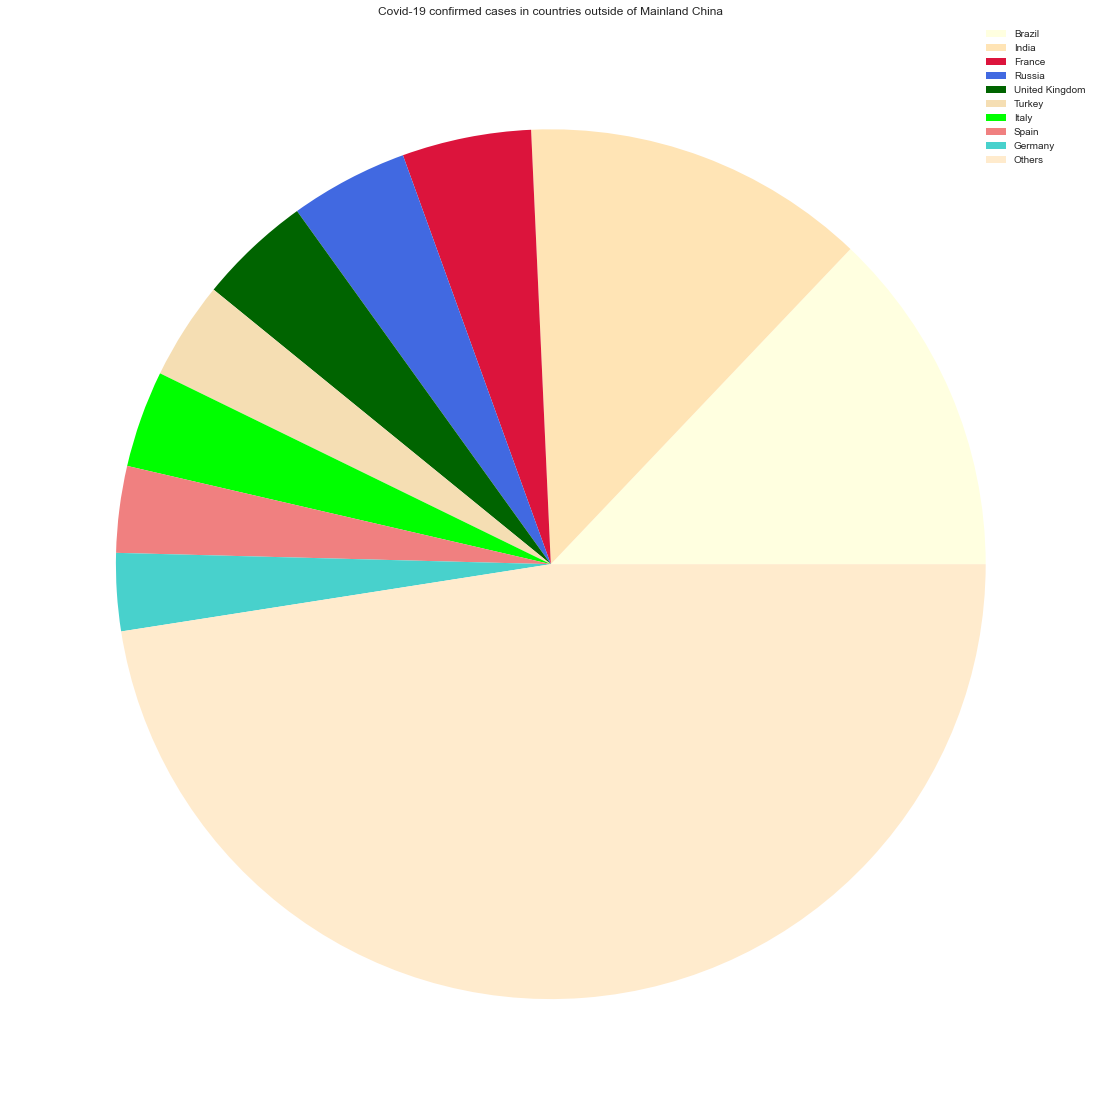

In [83]:
#Create a pie chart to see the total confirmed cases in 10 different countries outside china
c = random.choices(list(mcolors.CSS4_COLORS.values()), k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-19 confirmed cases in countries outside of Mainland China')
plt.pie(visual_confirmed_cases[1:], colors = c)
plt.legend(visual_unique_countries[1:], loc='best')
plt.show()